In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
tf.reset_default_graph()

In [5]:
num_inputs=784
num_hid1=392
num_hid2=196
num_hid3=392
num_outputs=num_inputs
learning_rate=0.01

In [6]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])
actf=tf.nn.relu

In [7]:
initializer=tf.variance_scaling_initializer()

In [9]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_outputs]),dtype=tf.float32)

In [10]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_outputs))

In [12]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [13]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [14]:
optimizer=tf.train.AdamOptimizer(learning_rate)

In [15]:
train=optimizer.minimize(loss)

In [16]:
init=tf.global_variables_initializer()

In [17]:
saver=tf.train.Saver()

In [18]:
num_epochs=5
batch_size=150
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        num_batches=mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict = {X:X_batch})
        training_loss=loss.eval(feed_dict={X:X_batch})
        print("EPOCH : {} LOSS :{}".format(epoch,training_loss))
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

EPOCH : 0 LOSS :0.028328143060207367
EPOCH : 1 LOSS :0.02498001605272293
EPOCH : 2 LOSS :0.02391880191862583
EPOCH : 3 LOSS :0.023445039987564087
EPOCH : 4 LOSS :0.025521157309412956


In [19]:
num_test_images=10

with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    results=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


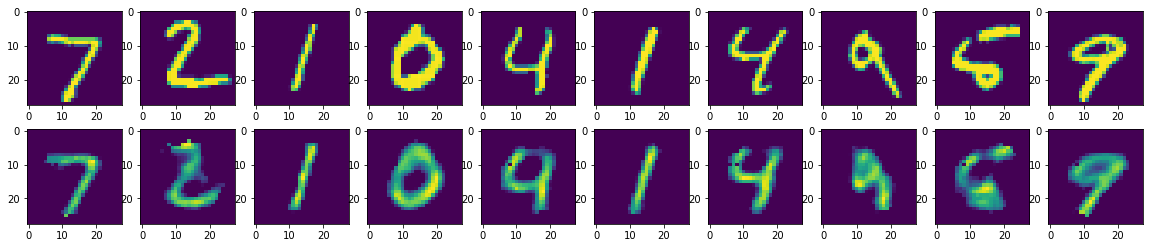

In [20]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))